#### Discussion Related With Outliers And Impact On Machine Learning 

Should we remove outliers or not ?? 

Answer is depends upon statement of the problem because in credit risk analysis these outliers plays a mojor role. likewise in fraud detection these outliers will play a dominant role.

Removing outliers is directly depends upon the dataset because if you see the Titanic dataset, should we keep the outliers or not.
Now, this decision will come after like what impact outlier will create on this dataset because in Titanic dataset we are going to decide whether the person will survive or not and in such condition what outliers will create impact that matters the most.
It was an accident that has happened and age other factors outliers won't effect the survival so we should remove it but in case of fraud detection we can't remove outliers and for this we have select a model which is not affected by the ouliers.  

Another Example: Suppose we are dealing with sales forecasting or stock/crypto analysis and there are sudden spikes on those datsets. 
Now, those spikes are outliers as those are distributed differently from average distribution within the datsets.Now, should we remove those outliers(spikes) or remove ??

Answer is that we should keep those ouliers(spikes) because these outliers are important factors for the analysis and we have to find the factors for such spikes(outliers) in our analysis.
So never ever delete these ouliers. 

Similar unusual money transaction is also an outliers in fraud detection dataset but we can't remove those outiers because these outliers(unusual fraud detection)is a factor factor of analysis.

#### Which machine learning models are very much sensitive to outliers  ??? 

1. Naive Bayes Classifier ---- Not Sensitive To Outliers. 
2. Support Vector Machine (SVM) ---- Not Sensitive To Outliers.
3. Linear Regression ----   Sensitive To Outliers.
4. Logistic Regression ---- Sensitive To Outliers
5. Decision Tree Regressor or Classifier ----  Not Sensitive To Outliers
6. Ensemble (RF, XGboost, GB)  ----  Not Sensitive To Outliers (internal methods by these models are Decision Tree)
7. KNN ---- Not Sensitive To Outliers.  
8. Kmeans ----  Sensitive To Outliers.
9. Hierarichal ---- Sensitive To Outliers.
10. PCA  ----  Very Very Sensitive To Outliers.
11. Neural Networks ----  Sensitive To Outliers.
12. LDA - Sensitive To Outliers

13. DBScan (Unsupervised learning) : Sensitive To Outliers.

** All Unsupervised models are Sensitive to Outliers.

Now, Dataset like fraud detection , sales prediction, crypto/stock prediction always those models which are not sensitive to ouliers because you need those ouliers for your analysis.

For Neural Networks also, don't select this model when your dataset is imbalanced or has an outliers. instead a good dataset, huge amount of data in case pf deep learning. 

In [3]:
import pandas as pd 

In [4]:
df= pd.read_csv(r"C:\Users\User\Desktop\Titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


From Above if you see the count row of each column you will observe that each column has 891.00 counts except Age..!! that is 714.00 which means Age has NaN values too...!!

In [12]:
df['Age'].isnull().sum()

177

In [13]:
import seaborn as sns 

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

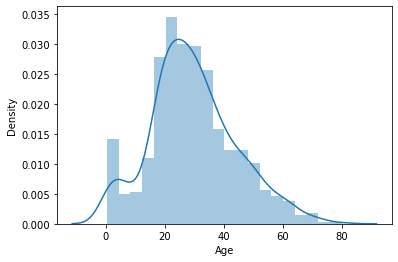

In [14]:
sns.distplot(df['Age'].dropna())

From above plot, it is observed that our dataset has not much ouliers, looks like a normal distribution.

As there is not much outliers, so let us create outliers for us.

for creating ouliers we will the NaN values with higher numbers and this will create outliers in Age columns.

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

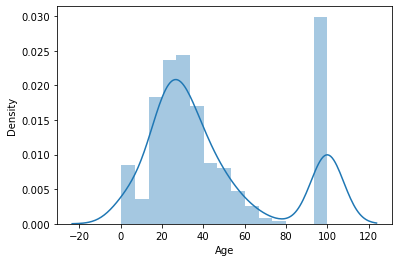

In [15]:
sns.distplot(df['Age'].fillna(100))

when i do this we have added one outlier called 100, now we will this outlier and see the impacts.

Text(0, 0.5, 'No_of_passengers')

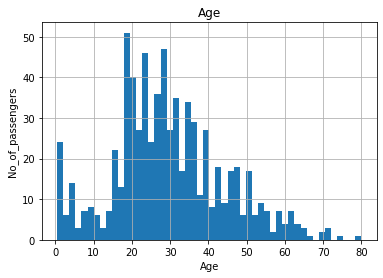

In [17]:
figure = df.Age.hist(bins=50)
figure.set_title('Age')
figure.set_xlabel('Age')
figure.set_ylabel('No_of_passengers')

Now, from above we have observed that our original data Age is normally distributed(Gaussian Distribution) and for finding ouliers under such distribution, different approach is needed called Three Standard Deviation.

To figure out outliers we will use boxplot here first ....

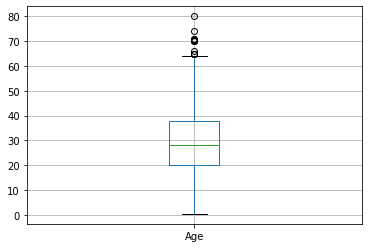

In [18]:
figure = df.boxplot(column= 'Age')

from above boxplot we observe that those dotted(encircle points) , that is Age from 65 - 80 are Outliers.

Even though we have not put any values on NaN, we have outliers.... 

In [19]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

Can we do these all analysis on pycharm ??
yes, we can do but we always have run whole code which will be time taking and here we are doing line by line so more understandings ....

#### Assuming Age follows Gausssian Distribution, the technique or the boundaries for calculating the outliers or differentiates the outliers through Three Standard Deviation Technique.

In Gaussian(Normal) distribution, Most important thing is Mean and from this mean we will calculate three standard median from left or right.

In [24]:
upper_boundary = df['Age'].mean() + 3* df['Age'].std()
upper_boundary

73.27860964406095

In [25]:
lower_boundary = df['Age'].mean() - 3* df['Age'].std()
lower_boundary

-13.88037434994331

In [26]:
print(lower_boundary), print(upper_boundary), print(df['Age'].mean())

-13.88037434994331
73.27860964406095
29.69911764705882


(None, None, None)

from above we observed that , lower_boundary has -ve value and in Age negative value can't be there..!! So lets compute the inter quartile range to calculate the boundaries, that is difference between 75% - 25% .

In [28]:
IQR = df.Age.quantile(0.75) - df.Age.quantile(0.25)
IQR

17.875

In [29]:
lower_bridge = df['Age'].quantile(0.25) - (IQR*1.5)
lower_bridge

-6.6875

In [30]:
upper_bridge = df['Age'].quantile(0.75) + (IQR*1.5)
upper_bridge

64.8125

After 64 in age column , everything is outlier ... 

So, Age cannot be negative so we will not consider any negative values for any kind of boundaries that is either lower_bridge or lower_boundary.

Note: Outliers Boundary For Gaussian/Normal Distribution can also be calculated by Z-Score Method too.

#### Extreme Value Analysis ( Only for Skewed Dataset, Not For Gaussian/Normal Distributed Dataset )

In [32]:
lower_bridge = df['Age'].quantile(0.25) - (IQR*3)
upper_bridge = df['Age'].quantile(0.75) + (IQR*3)
print(lower_bridge), print(upper_bridge)



-33.5
91.625


(None, None)

Above is for extreme outliers. and if you want to add extreme outliers with other outliers , you can do this too ..

But here in extreme outliers, after 91 in Age column. Everything is an outlier ......
Note : Extreme Value Boundary is considered for Outliers Boundary Only in case where Dataset is Skewed, not for Normal/Gaussian Distribution.

#### If Feature is skewed 

Text(0, 0.5, 'No_of_passengers')

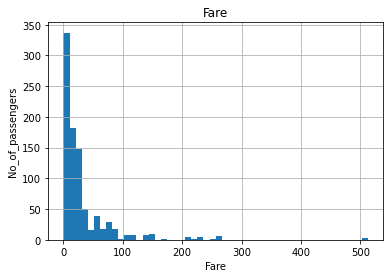

In [35]:
figure = df.Fare.hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No_of_passengers')

This particular dataset is right skewed and now see how to find outliers under such situation .....

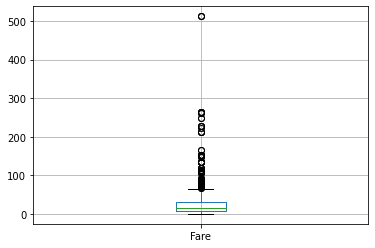

In [36]:
figure = df.boxplot(column= 'Fare')

we have huge amount of outliers ......

In [37]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

Lets compute the Interquantile range to calculate the boundaries....

In [38]:
IQR = df.Fare.quantile(0.75) - df.Fare.quantile(0.25)
IQR

23.0896

in case of skewed data, we cannot be permanent that this IQR range will work, it just a try ........for normal distribution, we should use IQR method but for skewed fare, just a try.

0     -36.300882
1     -84.300882
2     -48.300882
3     -75.300882
4     -75.300882
         ...    
886   -51.300882
887   -27.300882
888          NaN
889   -48.300882
890   -66.300882
Name: Age, Length: 891, dtype: float64
0       95.699118
1      143.699118
2      107.699118
3      134.699118
4      134.699118
          ...    
886    110.699118
887     86.699118
888           NaN
889    107.699118
890    125.699118
Name: Age, Length: 891, dtype: float64


(None, None)

In [41]:
lower_bridge = df['Fare'].quantile(0.25) - (IQR*1.5)
upper_bridge = df['Fare'].quantile(0.75) + (IQR*1.5)
print(lower_bridge), print(upper_bridge)

-26.724
65.6344


(None, None)

#### Extreme outliers 

In [42]:
lower_bridge = df['Fare'].quantile(0.25) - (IQR*3)
upper_bridge = df['Fare'].quantile(0.75) + (IQR*3)
print(lower_bridge), print(upper_bridge)

-61.358399999999996
100.2688


(None, None)

When the data is skewed, we should consider extreme outlier for outliers boundary , that is from 100 above everything is a oulier.that is from 100 to 500 , all are outliers in this skewed data .... 

Negative value cannot be considered because Fare cannot be negative .....

For extreme values, we should multiply IQR by 3 else we should multiply by IQR by 1.5.

Let's do some feature engineering and play with it .......

In [45]:
data = df.copy()

In [46]:
data.loc[data['Age']>73, 'Age'] = 73 # wherever the data is greater than 73, we are replacing with 73.
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [49]:
data.loc[data['Fare']>100, 'Fare'] = 100 # wherever the data is greater than 100, replace it with 100. 
data.tail(50)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
841,842,0,2,"Mudd, Mr. Thomas Charles",male,16.0,0,0,S.O./P.P. 3,10.5000,NaN,S
842,843,1,1,"Serepeca, Miss. Augusta",female,30.0,0,0,113798,31.0000,NaN,C
843,844,0,3,"Lemberopolous, Mr. Peter L",male,34.5,0,0,2683,6.4375,NaN,C
844,845,0,3,"Culumovic, Mr. Jeso",male,17.0,0,0,315090,8.6625,NaN,S
845,846,0,3,"Abbing, Mr. Anthony",male,42.0,0,0,C.A. 5547,7.5500,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.5500,NaN,S
847,848,0,3,"Markoff, Mr. Marin",male,35.0,0,0,349213,7.8958,NaN,C
848,849,0,2,"Harper, Rev. John",male,28.0,0,1,248727,33.0000,NaN,S
849,850,1,1,"Goldenberg, Mrs. Samuel L (Edwiga Grabowska)",female,NaN,1,0,17453,89.1042,C92,C
850,851,0,3,"Andersson, Master. Sigvard Harald Elias",male,4.0,4,2,347082,31.2750,NaN,S


Text(0, 0.5, 'No_of_passengers')

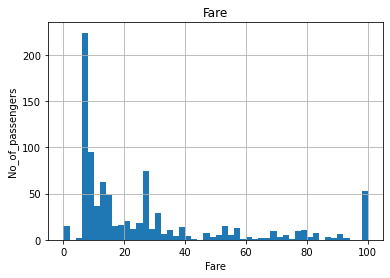

In [50]:
figure = data.Fare.hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No_of_passengers')

Now, maximum value has 100 only.

Text(0, 0.5, 'No_of_passengers')

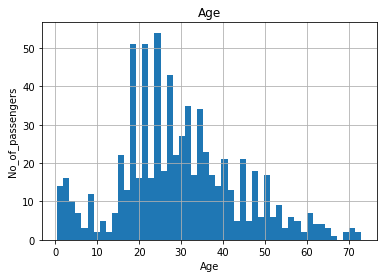

In [52]:
figure = data.Age.hist(bins=50)
figure.set_title('Age')
figure.set_xlabel('Age')
figure.set_ylabel('No_of_passengers')

In [79]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data[['Age', 'Fare']].fillna(0), data['Survived'], test_size = 0.2)


#### Logistic Regression 

In [80]:
from sklearn.linear_model import LogisticRegression 
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
y_pred1 = classifier.predict_proba(X_test)

from sklearn.metrics import accuracy_score, roc_auc_score
print("Accuracy_score: {}".format(accuracy_score(y_test, y_pred)))
print("roc_auc_score: {}".format(roc_auc_score(y_test,y_pred1[:,1])))

Accuracy_score: 0.6815642458100558
roc_auc_score: 0.6826053243732231


In [81]:
X_train.shape

(712, 2)

In [82]:
X_test.shape

(179, 2)

In [83]:
y_train.shape

(712,)

In [85]:
y_test.shape

(179,)

In [87]:
#RandomForestClassifier 

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data[['Age', 'Fare']].fillna(0), data['Survived'], test_size = 0.2)
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
y_pred1 = classifier.predict_proba(X_test)

from sklearn.metrics import accuracy_score, roc_auc_score
print("Accuracy_score: {}".format(accuracy_score(y_test, y_pred)))
print("roc_auc_score: {}".format(roc_auc_score(y_test,y_pred1[:,1])))


Accuracy_score: 0.6927374301675978
roc_auc_score: 0.7238471673254281
